# Introduccion a la Visualizacion de Datos.


Algunos años atrás el reto era como obtener millones de datos, pero en la actualidad esto ya no es un problema, no más hay que visitar el sitio web de [ChEMBL](https://www.ebi.ac.uk/chembl/) donde podemos encontrar una cantidad interesante de moléculas bioactivas con ciertas características para ser convertidas en medicamentos.

Si bien el campo de los datos va más allá de su manipulación, también como científicos es valioso desarrollar habilidades relacionadas con la presentación de nuestros hallazgos. Y si quisiéramos ir un poco más allá, algo importante a tener en cuenta aparte de una buena visualización es tener una historia que contar.

En Notebooks anteriores aprendimos a manipular algunos conjuntos de datos y para ello vimos desde lo básico de Python hasta lo más avanzado como lo son los [DataFrame](../2_PART_TWO/2.1_Dataframes.ipynb), ahora es tiempo de aprender a crear gráficas *(Visualizaciones)* de nuestros datos utilizando dos de las librerías más famosas en el mundo `Matplotlib` y `Seaborn`. Para la mayoría de los casos, con la primera de éstas sería más que suficiente, pero para realizar gráficas un poco más complejas vamos a utilizar la segunda. Con ellas dos trataremos de crear la mayoría de visualizaciones más populares.

### Introduccion a Matplotlib

Según el sitio web **Matplotlib es una libreria para la creacion de visualizaciones estáticas, animadas e intercativas en Python**. Simple, ¿recuerdan el concepto de Libreria? Si no [aqui](https://www.geeksforgeeks.org/libraries-in-python/) pueden leer un poco más al respecto. No hay mucho que agregar, más alla de que la libreria ya se encuentra instalada como parte de las dependencias del ambiente virtual del curso.

> En caso que la librería no esté instalada, puede utilizar el comnado `pip install matplotlib`, o `conda install matplotlib`.

Antes de empezar a graficar es bueno desarrollar un entendimiento basico de como funciona esta libreria, dado que en muchos escenarios veremos que es necesario realizar ciertas configuraciones.

#### El modulo Pyplot

Por lo general el módulo `pyplot` es el foco de interós cuando queremos gráficas con `Matplotlib`, a pesar de que la librería posee una gran variedad de funcionalidades asociadas a otras características como la configuraciín de los estilos y las animaciones. Por lo general, siempre importaremos el modulo de la siguiente forma:

```
    import matplotlib.pyplot as plt
```

Para crear una gráfica o **plot** debemos seguir una serie de pasos o llamados de ciertas funciones *(métodos)* que pertenecen al módulo `pyplot`.


Veamos cómo se hace a continuación, empecemos importando el dataset de [iris](./data/iris.data) y convirtiéndolo en un DataFrame:

In [2]:
# Se importa la libreria Pandas
import pandas as pd

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("./data/iris.data", names=["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "clase"])
df_iris.head()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Para la creación de la gráfica es necesario invocar el método `plot`, de la siguiente forma:

```
    plt.plot(x-axis, y-axis)
```

en donde `x-asix` y `y-axis` son los valores para los ejes respectivos del gráfico, y notemos que aun a este punto no tenemos nuestra visualización, porque para ello es necesario invocar el método `show` como lo vemos a continuación:

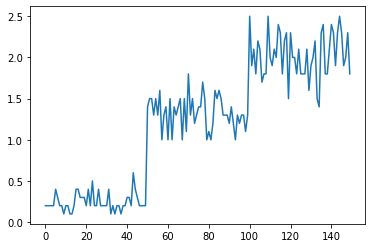

In [3]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.plot(df_iris.index, df_iris.ancho_petalo)

# Se visualiza la grafica
plt.show()

Como resultado tenemos un gráfico de líneas o por su nombre en inglés un **Line Plot**. 
En resumen, para la realización de una gráfica con `Matplotlib`, se deben seguir los siguientes pasos:

1. Se debe importar el módulo `pyplot` de la librería `Matplotlib`
2. Se debe inicializar la gráfica por medio del método `plot`.
3. Una vez terminada la inicialización y configuración del **plot** se debe invocar la visualización por medio del método `show`.

A veces es necesario crear una grafica de dos variables, por ejemplo si quisieramos ver la grafica de la evolucion del largo y ancho del petalo, hariamos lo siguiente:


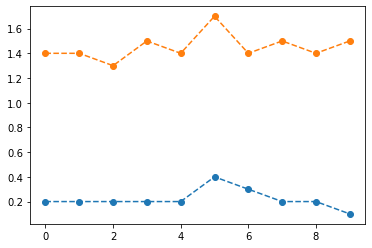

In [4]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.plot(df_iris.index[:10], df_iris.ancho_petalo[:10], 'o--')
plt.plot(df_iris.index[:10], df_iris.largo_petalo[:10], 'o--')

# Se visualiza la grafica
plt.show()

Ahora, que tal si quisieramos más alla de solo presentar una gráfica, darle un título y un nombre a sus ejes, y porque no visualizar los datos en una grilla:

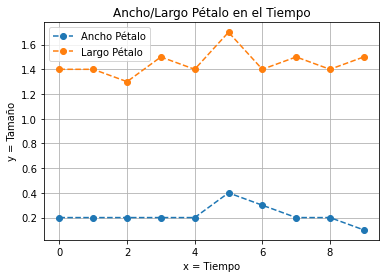

In [5]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.plot(df_iris.index[:10], df_iris.ancho_petalo[:10], 'o--')
plt.plot(df_iris.index[:10], df_iris.largo_petalo[:10], 'o--')

# Se configura las leyendas de las lineas graficadas
plt.legend(['Ancho Pétalo', 'Largo Pétalo'])

# Se habilita la grilla
plt.grid(True)

# Se le da un nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Tamaño')

# Se le da un titulo a la grafica
plt.title('Ancho/Largo Pétalo en el Tiempo')

# Se visualiza la grafica
plt.show()

Hasta aquí hemos visto como crear un gráfico de una línea y de multiples lineas y con ello hemos aprendido algunos de los métodos básicos de configuración de la libreria `Matplotlib`, ahora es el turno para configurar `Colores`, `Estilos` y `Marcadores` en la jerga de la libreria.

En especial hablaremos del tercer parametro del metodo `plot`:

```
    plt.plot(x, y, '[color][marker][linestyle]')
```

En este caso y retomando la gráfica anterior cambiaremos el color de las líneas:

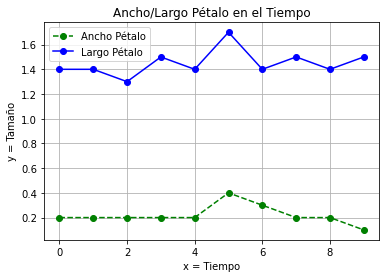

In [25]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.plot(df_iris.index[:10], df_iris.ancho_petalo[:10], 'go--')
plt.plot(df_iris.index[:10], df_iris.largo_petalo[:10], 'bo-')

# Se configura las leyendas de las lineas graficadas
plt.legend(['Ancho Pétalo', 'Largo Pétalo'])

# Se habilita la grilla
plt.grid(True)

# Se le da un nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Tamaño')

# Se le da un titulo a la grafica
plt.title('Ancho/Largo Pétalo en el Tiempo')

# Se visualiza la grafica
plt.show()

La salida es la misma pero vale las lineas tienen ahora un estilo diferente, para saber como darle colores, estilos y marcadores a tus graficas lo mejores es que des [click aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Pero estos gráficos nos dicen mucho sobre el dataset, de hecho, no es la mejor forma de visualizar la información presente en él.

### Gráficando con Pandas

Desde la libreria de `Pandas` poodemos invocar directamente la creacion de una grafica. Lo interesante es que aunque los objetos mas usuales de la libreria, como lo son `Series` y `DataFrame` tiene su propio metodo `plot`, que no es mas que una envoltura del metodo `plot` de `Matplotlib`.

Veamos como funciona intentando realizar la visualizacion de las clases de iris presentes en el dataset.


#### Grafico de Barras

Una de las visualizaciones mas conocidas es el Grafico de Barras o en Ingles el Bar Chart. Por lo general estos son los tipos de visualizaciones con las que quizás más interactuamos y nos encontramos familiarizados, aunque no seamos tan letrados en el universo de las estadísticas, este es un gráfico que se entiende a primera vista.

Tratemos de visualizar la cantidad de **clases de iris** desde el DataFrame previamente creado:



<AxesSubplot:>

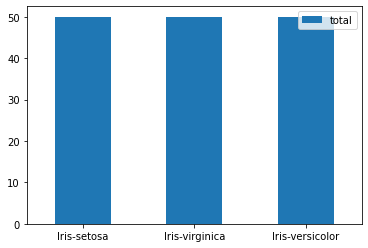

In [83]:
df_iris_clases = pd.DataFrame([
        len(df_iris.query('clase == "Iris-setosa"')),
        len(df_iris.query('clase == "Iris-virginica"')),
        len(df_iris.query('clase == "Iris-versicolor"'))
    ],
    columns=["total"],
    index=[
        "Iris-setosa",
        "Iris-virginica",
        "Iris-versicolor"
    ]
)
df_iris_clases.plot.bar(y=["total"], rot=0)

Por ahora podemos identifar que tan solo hay 50 observaciones de cada clase, pero queremos un poco mas de detalle, hay varias estadisticas en juego asi que vamos a darle un poc mas de vida a nuestra visualizacion:
    

,median_largo_sepalo,median_ancho_sepalo,median_largo_petalo,medina_ancho_petalo
setosa,5.0,3.4,1.50,0.2
virginica,6.5,3.0,5.55,2.0
versicolor,5.9,2.8,4.35,1.3


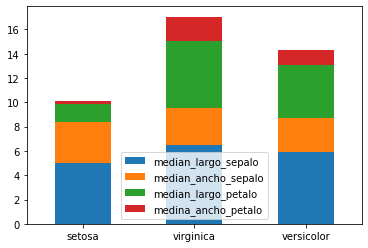

In [123]:
import numpy as np

df_iris_stats = pd.DataFrame([
        df_iris.query('clase == "Iris-setosa"')[["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo"]].median().tolist(),
        df_iris.query('clase == "Iris-virginica"')[["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo"]].median().tolist(),
        df_iris.query('clase == "Iris-versicolor"')[["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo"]].median().tolist()
  ],
  columns=["median_largo_sepalo", "median_ancho_sepalo", "median_largo_petalo", "medina_ancho_petalo"],
    index=[
        "setosa",
        "virginica",
        "versicolor"
   ]
)

df_iris_stats.plot.bar(rot=0, stacked=True)
df_iris_stats.head()

¿Y que podemos decir a través del grafico? Que tal la Iris-Virginicas en proporción a las demás sus sépalos y pétalos son mucho mas grandes.

Ahora a la pregunta tendra algo que ver el ancho del sepalo con el ancho del petalo? Para esto daremos paso a `Seaborn`.


### Graficando con Seaborn

Aqui la idea es crear un Scatter Plot en donde pueda relacionar dos variables.

# NO revisar de aqui para abajo

Como se puede ver en el grafico, visualizamos como el ancho del petalo ha variado en funcion del tiempo, aunque en el eje horizontal tecnicamente no hagamos referencia al tiempo.

Que tal ahora si intentamos graficar un tipico, pero visualmente sencillo Scatter Plot?, para ello debemos ejecutar el metodo `plot` como se muestra a continuacion:

```
    plt.plot(column, column, '[marker][linestyle][color]', data)
```

Graficemos el *largo del sepalo* en relacion con su ancho:


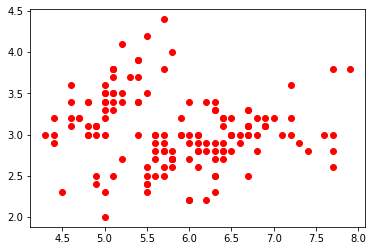

In [15]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.plot('largo_sepalo', 'ancho_sepalo', 'or', data=df_iris)

# Se visualiza la grafica de Scatter Plot
plt.show()

Por suerte la libreria de `Pandas` tiene un componente de visualizacion el cual es powered by `Matplotlib`, aunque esto tiene sus ventajas tambien tiene un costo asociado, se pierde un poco de flexibilidad, aun asi es un buen punto de partida.



Es bonito, no? Inteligentemente `plot` recibio el *DataFrame* y accedio a sus columnas por medios de los *strings* pasados como parametros. Si quieren saber un poco mas de la configuracion de estilos para este tipo de graficos dirijanse a la seccion de la documentacion haciendo [clic aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Tambien es posible crear **histogramas** con el metodo `plot`, veamos como se hace a continuacion:

```
    plt.hist(data)
```

Intenemos basicamente hacer la distribucion del `ancho_petalo` para las `Iris-virginica`:


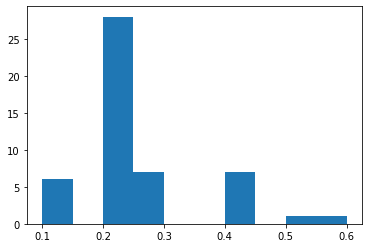

In [22]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se crea la grafica por medio del metodo plot
plt.hist(df_iris.query('clase == "Iris-setosa"').ancho_petalo)

# Se visualiza la grafica de Scatter Plot
plt.show()

Podriamos pasar el capitulo completo, divirtiendonos con el metodo `plot` pero no es el proposito principal de este Notebook. Volvamos y tratemos de graficar las barras por el tipo de clases de iris.

In [ ]:
# Incluir el grafico de barras

## Incluir las varientas del grafico de barras, horizontal, vertical, vertical stacked, horizontal stacked bar

## Graficas de Linea

Incluir ejemplos de graficas de linea aunque el dataset de pronto no se ajuste

## Graficas de Pie

Incluir ejemplos de graficas de pie

## Graficas de Scatterplot

Incluir ejemplos de graficas de pie